In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [38]:
print(len(df))

545


In [39]:
df = df[df['area']<8000]
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [40]:
x = df['area']
y = df['price']
y.head()

0    13300000
3    12215000
4    11410000
5    10850000
9     9800000
Name: price, dtype: int64

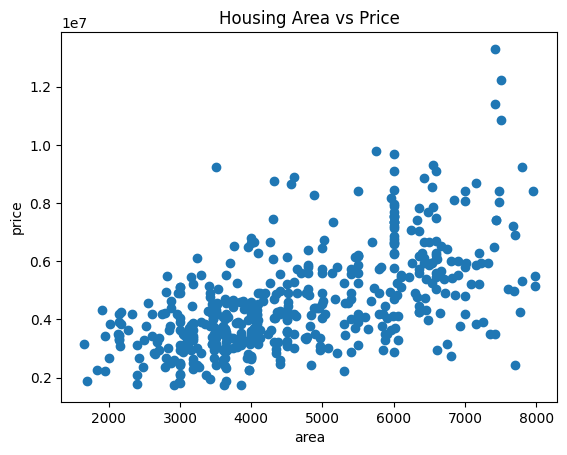

In [41]:
plt.scatter(x,y)
plt.xlabel('area')
plt.ylabel('price')
plt.title('Housing Area vs Price')
plt.show()

In [42]:
x = x.to_numpy()
y = y.to_numpy()

In [43]:
# calculate Gradient
def get_gradient(x,y,m,b):
    n=len(x)
    gradW=(2/n)*np.sum(x*(m*x+b-y))
    gradB=(2/n)*np.sum(m*x+b-y)
    return gradW,gradB


In [44]:
## Gradient Descent
def gradient_descent(x,y,m,b,e,iteration):
    
    for  i in range(iteration):
        gradW,gradB=get_gradient(x,y,m,b)
        m=m-e*(gradW)
        b=b-e*(gradB)
    return m,b

In [48]:
# normalizing data
x_mean = np.mean(x)
x_std = np.std(x)
y_mean = np.mean(y)
y_std = np.std(y)

x_scaled = (x - x_mean) / x_std
y_scaled = (y - y_mean) / y_std

In [75]:
# final slope
m=0
b=0
m,b=gradient_descent(x_scaled,y_scaled,m,b,0.001,1000)
y_pred = m*x_scaled + b
print(f"m={m},b={b}")

m=0.5102741412341307,b=2.083872789194593e-18


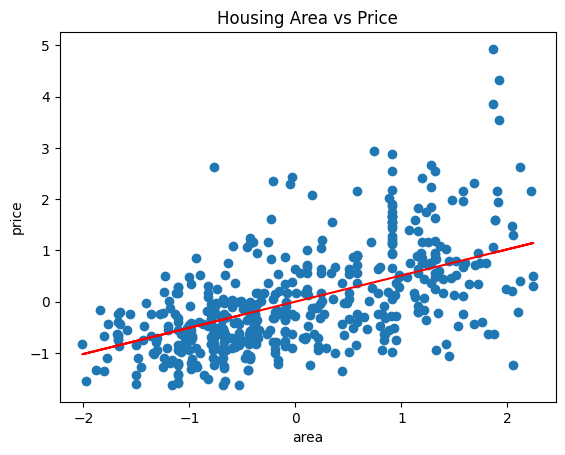

In [76]:
plt.scatter(x_scaled,y_scaled)
plt.plot(x_scaled,y_pred,'r-')
plt.xlabel('area')
plt.ylabel('price')
plt.title('Housing Area vs Price')
plt.show()